# PREPARAÇÃO


#1. Importação das Bibliotecas


In [1]:
import pandas as pd
import csv
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

##1.1 Carregamento dos Dados

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
consumo_path = '/content/drive/Shareddrives/M11_SI/CONSUMO_2020.csv'
fraudes_path = '/content/drive/Shareddrives/M11_SI/FRAUDES.csv'

#2. Análise Inicial dos Dados


In [4]:
df_consumo = pd.read_csv(consumo_path, delimiter=';', dtype={'MATRICULA': 'int64'})
df_fraudes = pd.read_csv(fraudes_path, delimiter=';', dtype={'MATRICULA': 'int64'})

In [5]:
import pyarrow.parquet as pq

df_consumo.to_parquet('consumo.parquet')
df_fraudes.to_parquet('fraudes.parquet')

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(df_fraudes.dtypes)

Unnamed: 0                     int64
TIPOOS                        object
ANOOS                        float64
IDOSP                          int64
ANOMES                        object
MATRICULA                      int64
OS                             int64
SERVICO                        int64
DESCRICAO                     object
COD_GRUPO                    float64
SETOR                        float64
EQP                           object
DATAEMISSAO                   object
DATAPROGRAMACAO               object
DATAINICIO                    object
DATACONCLUSAO                 object
STATUS                        object
ATRASO                        object
CODEXECOCOR                  float64
MOTIVOEXECOCOR                object
TEMPOPADRAO                  float64
TEMPOATENDIMENTO             float64
DESCRSETOR                    object
DESCRSETORSOLICITANTE         object
DAT_AGENDAMENTO               object
SF                            object
NR_ROTA                       object
I

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(df_consumo.dtypes)

Unnamed: 0                int64
EMP_CODIGO              float64
REFERENCIA               object
COD_GRUPO               float64
COD_SETOR_COMERCIAL     float64
NUM_QUADRA              float64
COD_ROTA_LEITURA        float64
MATRICULA                 int64
SEQ_RESPONSAVEL         float64
ECO_RESIDENCIAL         float64
ECO_COMERCIAL           float64
ECO_INDUSTRIAL          float64
ECO_PUBLICA             float64
ECO_OUTRAS              float64
LTR_ATUAL               float64
LTR_COLETADA            float64
DAT_LEITURA              object
DIAS_LEITURA            float64
CONS_MEDIDO             float64
TIPO_LIGACAO             object
CATEGORIA                object
SUB_CATEGORIA            object
DSC_OCORRENCIA           object
COD_LEITURA_INF_1       float64
COD_LEITURA_INF_2       float64
COD_LEITURA_INF_3       float64
HORA_LEITURA             object
DSC_SIMULTANEA           object
VOLUME_ESTIMADO         float64
VOLUME_ESTIMADO_ACUM    float64
FATURADO_MEDIA           object
COD_LEIT

In [8]:
df_consumo['SUB_CATEGORIA']

,SUB_CATEGORIA
0,PUBLICA
1,COMERCIAL
2,PUBLICA
3,RESIDENCIAL
4,COMERCIAL
...,...
4297805,RESIDENCIAL
4297806,RESIDENCIAL
4297807,RESIDENCIAL
4297808,RESIDENCIAL


In [9]:
df_consumo = df_consumo.drop('Unnamed: 0', axis=1)
df_fraudes = df_fraudes.drop('Unnamed: 0', axis=1)

In [10]:
print("\nPrimeiras linhas do DataFrame de Fraudes:")
df_fraudes.head()


Primeiras linhas do DataFrame de Fraudes:


,TIPOOS,ANOOS,IDOSP,ANOMES,MATRICULA,OS,SERVICO,DESCRICAO,COD_GRUPO,SETOR,...,DS_SERVICO_SOLICITADO,FL_EXECUTADO,NM_TIPO_EXECUCAO,DT_LIMITE_EXECUCAO,DT_SERVICO,DT_FECHAMENTO,PARECER_EXECUCAO,FL_PROGRAMACAO_AUTOMATICA,NMCOMUNIDADE,AREAATUACAO
0,Desdobro,2023.0,230101031796,11/23,17229588,1031796,110013,IRREGULARIDADE IDENTIFICADA,NaN,80.0,...,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1.0,activityCompleted,2024-03-11 23:59:59,2023-11-06 00:00:00,2023-11-06 11:07:02,HD interno,NaN,NaN,NaN
1,Desdobro,2024.0,240100141765,02/24,17804014,141765,110013,IRREGULARIDADE IDENTIFICADA,NaN,70.0,...,VISTORIA DE IRREGULARIDADE,1.0,activityCompleted,2024-06-24 23:59:59,2024-02-13 00:00:00,2024-02-13 15:59:01,421,NaN,NaN,NaN
2,Desdobro,2024.0,240100021314,01/24,17234771,21314,110013,IRREGULARIDADE IDENTIFICADA,NaN,96.0,...,VISTORIA DE IRREGULARIDADE IDENTIFICADA - LEITURA,1.0,activityCompleted,2024-04-22 23:59:59,2024-01-08 00:00:00,2024-01-08 15:45:46,413,NaN,NaN,NaN
3,Desdobro,2023.0,230101217142,12/23,17837656,1217142,110013,IRREGULARIDADE IDENTIFICADA,NaN,1.0,...,VISTORIA DE IRREGULARIDADE SUSPEITA - LEITURISTA,1.0,activityCompleted,2024-05-08 23:59:59,2024-01-03 00:00:00,2024-01-03 15:40:12,No local ligação cortada e violado no cavalete...,NaN,NaN,NaN
4,Desdobro,2024.0,240100077627,01/24,17722316,77627,110013,IRREGULARIDADE IDENTIFICADA,NaN,84.0,...,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1.0,activityCompleted,2024-05-31 23:59:59,2024-01-24 00:00:00,2024-01-24 08:53:18,421,NaN,NaN,NaN


In [11]:
print("\nEstatísticas Descritivas do Consumo Medido:")
df_consumo.describe()


Estatísticas Descritivas do Consumo Medido:


,EMP_CODIGO,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,ECO_COMERCIAL,ECO_INDUSTRIAL,...,DIAS_LEITURA,CONS_MEDIDO,COD_LEITURA_INF_1,COD_LEITURA_INF_2,COD_LEITURA_INF_3,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,COD_LEITURA_INT,COD_LATITUDE,COD_LONGITUDE
count,4297810.0,4.297750e+06,4.297750e+06,4.297750e+06,4.297750e+06,4.297810e+06,4.297810e+06,4.297810e+06,4.297810e+06,4.297810e+06,...,4.297810e+06,4.297810e+06,620487.000000,24494.000000,1233.000000,4.297810e+06,4.297810e+06,4.297810e+06,4.297786e+06,4.297786e+06
mean,2.0,1.232554e+01,5.313025e+01,2.603805e+02,2.512707e+01,1.762701e+07,5.777745e+05,1.059305e+00,8.456446e-02,1.610122e-04,...,2.999462e+01,1.259411e+01,487.769054,241.869233,272.150041,5.332320e-02,3.152901e-01,8.835752e+02,-2.047882e+01,-5.461657e+01
std,0.0,6.579928e+00,2.901821e+01,2.053288e+02,1.429831e+01,2.867285e+05,3.212842e+05,4.564257e+00,5.624756e-01,1.268804e-02,...,4.671798e+00,1.156936e+02,76.274914,84.614038,116.170928,1.008646e+01,1.737974e+01,1.155471e+02,1.667280e-01,4.204240e-01
min,2.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.700000e+07,1.000100e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,100.000000,102.000000,104.000000,-4.659000e+03,0.000000e+00,1.000000e+02,-2.099238e+01,-5.476463e+01
25%,2.0,8.000000e+00,2.800000e+01,1.000000e+02,1.300000e+01,1.734690e+07,2.638270e+05,1.000000e+00,0.000000e+00,0.000000e+00,...,2.900000e+01,3.000000e+00,507.000000,207.000000,207.000000,0.000000e+00,0.000000e+00,9.000000e+02,-2.051763e+01,-5.465171e+01
50%,2.0,1.200000e+01,5.500000e+01,2.100000e+02,2.500000e+01,1.777423e+07,5.748770e+05,1.000000e+00,0.000000e+00,0.000000e+00,...,3.100000e+01,9.000000e+00,507.000000,207.000000,229.000000,0.000000e+00,0.000000e+00,9.000000e+02,-2.047921e+01,-5.462192e+01
75%,2.0,1.600000e+01,7.900000e+01,3.680000e+02,3.700000e+01,1.786863e+07,8.531180e+05,1.000000e+00,0.000000e+00,0.000000e+00,...,3.200000e+01,1.500000e+01,507.000000,229.000000,229.000000,0.000000e+00,0.000000e+00,9.000000e+02,-2.044119e+01,-5.458569e+01
max,2.0,9.900000e+01,9.900000e+01,1.000000e+03,8.000000e+01,1.796950e+07,1.110535e+06,8.320000e+02,1.750000e+02,1.000000e+00,...,9.900000e+01,9.997000e+04,516.000000,516.000000,516.000000,6.009000e+03,1.792900e+04,9.090000e+02,0.000000e+00,0.000000e+00


In [12]:
print("\nEstatísticas Descritivas das Fraudes:")
df_fraudes.describe()


Estatísticas Descritivas das Fraudes:


,ANOOS,IDOSP,MATRICULA,OS,SERVICO,COD_GRUPO,SETOR,CODEXECOCOR,TEMPOPADRAO,TEMPOATENDIMENTO,ID_CONTRATO,CD_CONTRATO,CD_SUB_REGIAO,CD_REGIAO,FL_PRINCIPAL,FL_EXECUTADO,FL_PROGRAMACAO_AUTOMATICA,NMCOMUNIDADE,AREAATUACAO
count,225997.000000,2.259970e+05,2.259970e+05,2.259970e+05,225997.000000,152207.000000,225993.000000,225997.000000,176084.0,176084.000000,225997.000000,225997.000000,176084.000000,176084.0,225997.000000,225997.0,176084.000000,0.0,0.0
mean,2021.801236,2.181148e+11,1.762096e+07,8.207161e+07,86997.988615,4.900051,59.544296,0.077820,28.0,14852.326276,50.349717,23.079709,1.003515,1.0,0.000876,1.0,0.225500,NaN,NaN
std,1.607108,1.608186e+10,2.699496e+06,4.743635e+07,44219.234981,7.149292,28.341075,2.918941,0.0,22988.935443,4.977902,9.540978,0.121954,0.0,0.029586,0.0,0.417913,NaN,NaN
min,2018.000000,2.201000e+03,1.707534e+07,1.000000e+00,2039.000000,2.000000,1.000000,0.000000,28.0,-37620.000000,41.000000,18.000000,1.000000,1.0,0.000000,1.0,0.000000,NaN,NaN
25%,2021.000000,2.101002e+11,1.734115e+07,1.000354e+08,110013.000000,4.000000,37.000000,0.000000,28.0,2820.000000,53.000000,18.000000,1.000000,1.0,0.000000,1.0,0.000000,NaN,NaN
50%,2022.000000,2.201010e+11,1.772560e+07,1.003538e+08,110013.000000,4.000000,66.000000,0.000000,28.0,5640.000000,53.000000,18.000000,1.000000,1.0,0.000000,1.0,0.000000,NaN,NaN
75%,2023.000000,2.301007e+11,1.784884e+07,1.006760e+08,110013.000000,4.000000,83.000000,0.000000,28.0,15960.000000,53.000000,18.000000,1.000000,1.0,0.000000,1.0,0.000000,NaN,NaN
max,2024.000000,2.402007e+11,9.210226e+08,7.003035e+08,110013.000000,106.000000,99.000000,218.000000,28.0,334560.000000,53.000000,41.000000,15.000000,1.0,1.000000,1.0,1.000000,NaN,NaN


#3. Tratamento de Dados


##3.1. Tratamento de Valores Nulos


In [13]:
# Verificar a quantidade de valores nulos em cada coluna
missing_values_consumo = df_consumo.isnull().sum()
print("Valores ausentes CONSUMO:\n", missing_values_consumo[missing_values_consumo > 0])

missing_values_fraudes = df_fraudes.isnull().sum()
print("\nValores nulos FRAUDES:", missing_values_fraudes[missing_values_fraudes > 0])

# Preencher nulos com a mediana de uma coluna

for df in [df_consumo, df_fraudes]:
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna('Desconhecido', inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

Valores ausentes CONSUMO:
 COD_GRUPO                   60
COD_SETOR_COMERCIAL         60
NUM_QUADRA                  60
COD_ROTA_LEITURA            60
COD_LEITURA_INF_1      3677323
COD_LEITURA_INF_2      4273316
COD_LEITURA_INF_3      4296577
FATURADO_MEDIA         4201723
COD_LATITUDE                24
COD_LONGITUDE               24
dtype: int64

Valores nulos FRAUDES: COD_GRUPO                     73790
SETOR                             4
DATAPROGRAMACAO                1599
MOTIVOEXECOCOR                49913
TEMPOPADRAO                   49913
TEMPOATENDIMENTO              49913
DESCRSETORSOLICITANTE        211590
DAT_AGENDAMENTO              177267
SF                            49913
NR_ROTA                       49915
CD_SUB_REGIAO                 49913
CD_REGIAO                     49913
DT_FECHAMENTO                   435
PARECER_EXECUCAO             122250
FL_PROGRAMACAO_AUTOMATICA     49913
NMCOMUNIDADE                 225997
AREAATUACAO                  225997
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [14]:
df_consumo.head(3)

,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,ECO_COMERCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2.0,2020-05-01,6.0,25.0,136.0,20.0,17878422,1000092.0,0.0,0.0,...,69-RETIDA - CONSOLIDADO,0.0,0.0,Desconhecido,900.0,N,Normal,S,-20.462311,-54.563373
1,2.0,2020-10-01,9.0,1.0,68.0,1.0,17843197,399664.0,0.0,1.0,...,62-RETIDA - NÃO IMPRESSA,0.0,0.0,MEDIA,107.0,N,Normal,N,-20.460588,-54.610802
2,2.0,2020-12-01,6.0,25.0,136.0,20.0,17878422,1000092.0,0.0,0.0,...,69-RETIDA - CONSOLIDADO,0.0,0.0,Desconhecido,900.0,N,Normal,S,-20.462311,-54.563373


In [15]:
df_fraudes.head(3)

,TIPOOS,ANOOS,IDOSP,ANOMES,MATRICULA,OS,SERVICO,DESCRICAO,COD_GRUPO,SETOR,...,DS_SERVICO_SOLICITADO,FL_EXECUTADO,NM_TIPO_EXECUCAO,DT_LIMITE_EXECUCAO,DT_SERVICO,DT_FECHAMENTO,PARECER_EXECUCAO,FL_PROGRAMACAO_AUTOMATICA,NMCOMUNIDADE,AREAATUACAO
0,Desdobro,2023.0,230101031796,11/23,17229588,1031796,110013,IRREGULARIDADE IDENTIFICADA,4.0,80.0,...,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1.0,activityCompleted,2024-03-11 23:59:59,2023-11-06 00:00:00,2023-11-06 11:07:02,HD interno,0.0,NaN,NaN
1,Desdobro,2024.0,240100141765,02/24,17804014,141765,110013,IRREGULARIDADE IDENTIFICADA,4.0,70.0,...,VISTORIA DE IRREGULARIDADE,1.0,activityCompleted,2024-06-24 23:59:59,2024-02-13 00:00:00,2024-02-13 15:59:01,421,0.0,NaN,NaN
2,Desdobro,2024.0,240100021314,01/24,17234771,21314,110013,IRREGULARIDADE IDENTIFICADA,4.0,96.0,...,VISTORIA DE IRREGULARIDADE IDENTIFICADA - LEITURA,1.0,activityCompleted,2024-04-22 23:59:59,2024-01-08 00:00:00,2024-01-08 15:45:46,413,0.0,NaN,NaN


## 3.2. Normalização das variáveis numéricas

In [17]:
# Lista de colunas numéricas que você quer normalizar
colunas_consumo = ['CONS_MEDIDO', 'LTR_ATUAL', 'LTR_COLETADA']  # Substitua pelos nomes das colunas desejadas

# Normalização das variáveis numéricas selecionadas
for coluna in colunas_consumo:
  if coluna in df_consumo.columns:
    df_consumo[coluna] = (df_consumo[coluna] - df_consumo[coluna].min()) / (df_consumo[coluna].max() - df_consumo[coluna].min())
  else:
    print(f"Coluna '{coluna}' não encontrada no DataFrame.")

Coluna 'NUMERO_DE_VISITAS' não encontrada no DataFrame.
Coluna 'IDADE_DO_CLIENTE' não encontrada no DataFrame.
Coluna 'NUMERO_DE_VISITAS' não encontrada no DataFrame.


In [18]:
print("\nDataFrame de Consumo após preparação:")
df_consumo.head()


DataFrame de Consumo após preparação:


,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,ECO_COMERCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2.0,2020-05-01,6.0,25.0,136.0,20.0,17878422,1000092.0,0.0,0.0,...,69-RETIDA - CONSOLIDADO,0.0,0.0,Desconhecido,900.0,N,Normal,S,-20.462311,-54.563373
1,2.0,2020-10-01,9.0,1.0,68.0,1.0,17843197,399664.0,0.0,1.0,...,62-RETIDA - NÃO IMPRESSA,0.0,0.0,MEDIA,107.0,N,Normal,N,-20.460588,-54.610802
2,2.0,2020-12-01,6.0,25.0,136.0,20.0,17878422,1000092.0,0.0,0.0,...,69-RETIDA - CONSOLIDADO,0.0,0.0,Desconhecido,900.0,N,Normal,S,-20.462311,-54.563373
3,2.0,2020-11-01,17.0,32.0,130.0,14.0,17268576,531263.0,1.0,0.0,...,02-CAIXA CORREIO,0.0,0.0,Desconhecido,900.0,N,Normal,S,-20.428730,-54.625205
4,2.0,2020-09-01,19.0,62.0,150.0,32.0,17945983,870031.0,0.0,1.0,...,60-RETIDA - MED > 2X MED MEDID,0.0,0.0,Desconhecido,902.0,N,Normal,S,-20.413378,-54.555052


In [19]:
print("\nDataFrame de Fraudes após preparação:")
df_fraudes.head()


DataFrame de Fraudes após preparação:


,TIPOOS,ANOOS,IDOSP,ANOMES,MATRICULA,OS,SERVICO,DESCRICAO,COD_GRUPO,SETOR,...,DS_SERVICO_SOLICITADO,FL_EXECUTADO,NM_TIPO_EXECUCAO,DT_LIMITE_EXECUCAO,DT_SERVICO,DT_FECHAMENTO,PARECER_EXECUCAO,FL_PROGRAMACAO_AUTOMATICA,NMCOMUNIDADE,AREAATUACAO
0,Desdobro,2023.0,230101031796,11/23,17229588,1031796,110013,IRREGULARIDADE IDENTIFICADA,4.0,80.0,...,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1.0,activityCompleted,2024-03-11 23:59:59,2023-11-06 00:00:00,2023-11-06 11:07:02,HD interno,0.0,NaN,NaN
1,Desdobro,2024.0,240100141765,02/24,17804014,141765,110013,IRREGULARIDADE IDENTIFICADA,4.0,70.0,...,VISTORIA DE IRREGULARIDADE,1.0,activityCompleted,2024-06-24 23:59:59,2024-02-13 00:00:00,2024-02-13 15:59:01,421,0.0,NaN,NaN
2,Desdobro,2024.0,240100021314,01/24,17234771,21314,110013,IRREGULARIDADE IDENTIFICADA,4.0,96.0,...,VISTORIA DE IRREGULARIDADE IDENTIFICADA - LEITURA,1.0,activityCompleted,2024-04-22 23:59:59,2024-01-08 00:00:00,2024-01-08 15:45:46,413,0.0,NaN,NaN
3,Desdobro,2023.0,230101217142,12/23,17837656,1217142,110013,IRREGULARIDADE IDENTIFICADA,4.0,1.0,...,VISTORIA DE IRREGULARIDADE SUSPEITA - LEITURISTA,1.0,activityCompleted,2024-05-08 23:59:59,2024-01-03 00:00:00,2024-01-03 15:40:12,No local ligação cortada e violado no cavalete...,0.0,NaN,NaN
4,Desdobro,2024.0,240100077627,01/24,17722316,77627,110013,IRREGULARIDADE IDENTIFICADA,4.0,84.0,...,VISTORIA DE IRREGULARIDADE - IMPEDIMENTO DE AC...,1.0,activityCompleted,2024-05-31 23:59:59,2024-01-24 00:00:00,2024-01-24 08:53:18,421,0.0,NaN,NaN


## 3.3. Tratamento das variáveis categóricas

In [20]:
# Criando o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Aplicando o OneHotEncoder em df_consumo
encoded_data_consumo = encoder.fit_transform(df_consumo[['CATEGORIA', 'SUB_CATEGORIA','TIPO_LIGACAO', 'EXCECAO', 'FATURADO_MEDIA']])
encoded_df_consumo = pd.DataFrame(encoded_data_consumo, columns=encoder.get_feature_names_out(['CATEGORIA', 'SUB_CATEGORIA', 'TIPO_LIGACAO', 'EXCECAO', 'FATURADO_MEDIA']))

df_consumo = df_consumo.drop(['CATEGORIA', 'SUB_CATEGORIA', 'TIPO_LIGACAO', 'EXCECAO', 'FATURADO_MEDIA'], axis=1)
df_consumo = pd.concat([df_consumo, encoded_df_consumo], axis=1)

# Aplicando o OneHotEncoder em df_fraudes
encoded_data_fraudes = encoder.fit_transform(df_fraudes[['DESCRICAO', 'NM_TIPO_EXECUCAO', 'DS_SERVICO_SOLICITADO', 'TIPOOS']])
encoded_df_fraudes = pd.DataFrame(encoded_data_fraudes, columns=encoder.get_feature_names_out(['DESCRICAO', 'NM_TIPO_EXECUCAO', 'DS_SERVICO_SOLICITADO', 'TIPOOS']))

df_fraudes = df_fraudes.drop(['DESCRICAO', 'NM_TIPO_EXECUCAO', 'DS_SERVICO_SOLICITADO', 'TIPOOS'], axis=1)
df_fraudes = pd.concat([df_fraudes, encoded_df_fraudes], axis=1)

In [21]:
# Converter a coluna 'REFERENCIA' para o tipo datetime
df_consumo['REFERENCIA'] = pd.to_datetime(df_consumo['REFERENCIA'])

In [22]:
df_consumo.head()

,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,ECO_COMERCIAL,...,TIPO_LIGACAO_Consumo Fixo,TIPO_LIGACAO_Hidrometrado,EXCECAO_Faturar Volume Limite,EXCECAO_Faturar apenas o Excesso,EXCECAO_Faturar até o Limite,EXCECAO_Isento Agua e Esgoto,EXCECAO_Isento Esgoto,EXCECAO_Normal,FATURADO_MEDIA_Desconhecido,FATURADO_MEDIA_MEDIA
0,2.0,2020-05-01,6.0,25.0,136.0,20.0,17878422,1000092.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2.0,2020-10-01,9.0,1.0,68.0,1.0,17843197,399664.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2.0,2020-12-01,6.0,25.0,136.0,20.0,17878422,1000092.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2.0,2020-11-01,17.0,32.0,130.0,14.0,17268576,531263.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2.0,2020-09-01,19.0,62.0,150.0,32.0,17945983,870031.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [23]:
# Salvar os dados processados
# df_consumo.to_csv('/content/drive/Shareddrives/M11_SI/CONSUMO_V2.csv', index=False)
# df_fraudes.to_csv('/content/drive/Shareddrives/M11_SI/FRAUDES_V2.csv', index=False)

##  3.4. Merge das tabelas tratadas

In [24]:
fraudes_2020 = df_fraudes[df_fraudes['ANOMES'].str.endswith('20')]

In [25]:
matriculas_fraude = set(df_fraudes['MATRICULA'])

In [26]:
fraudes_consumo = df_consumo.copy()

In [27]:
fraudes_consumo['FRAUDE'] = fraudes_consumo['MATRICULA'].apply(lambda x: 1 if x in matriculas_fraude else 0)

In [28]:
fraudes_consumo['FRAUDE'].value_counts()

,count
FRAUDE,
0,2861056
1,1436754


In [29]:
fraudes_consumo

,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,ECO_COMERCIAL,...,TIPO_LIGACAO_Hidrometrado,EXCECAO_Faturar Volume Limite,EXCECAO_Faturar apenas o Excesso,EXCECAO_Faturar até o Limite,EXCECAO_Isento Agua e Esgoto,EXCECAO_Isento Esgoto,EXCECAO_Normal,FATURADO_MEDIA_Desconhecido,FATURADO_MEDIA_MEDIA,FRAUDE
0,2.0,2020-05-01,6.0,25.0,136.0,20.0,17878422,1000092.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,2.0,2020-10-01,9.0,1.0,68.0,1.0,17843197,399664.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
2,2.0,2020-12-01,6.0,25.0,136.0,20.0,17878422,1000092.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,2.0,2020-11-01,17.0,32.0,130.0,14.0,17268576,531263.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,2.0,2020-09-01,19.0,62.0,150.0,32.0,17945983,870031.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297805,2.0,2020-12-01,15.0,59.0,36.0,31.0,17804101,287142.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4297806,2.0,2020-12-01,18.0,45.0,184.0,11.0,17118461,106237.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4297807,2.0,2020-12-01,9.0,5.0,48.0,4.0,17078892,84650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4297808,2.0,2020-12-01,13.0,46.0,410.0,21.0,17706498,227588.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


In [30]:
# Análise de fraudes
fraude_ratio = fraudes_consumo['FRAUDE'].mean()
print(f"Proporção de casos de fraude: {fraude_ratio:.2%}")

Proporção de casos de fraude: 33.43%


In [31]:
fraudes_consumo.to_csv('/content/drive/Shareddrives/M11_SI/MERGE.csv', index=False)

# 4. Análise dos dados

In [ ]:
filtered_df = pd.read_csv('/content/drive/Shareddrives/M11_SI/MERGE.csv', delimiter=';', dtype={'MATRICULA': 'int64'})

## 4.1. Dados de consumo

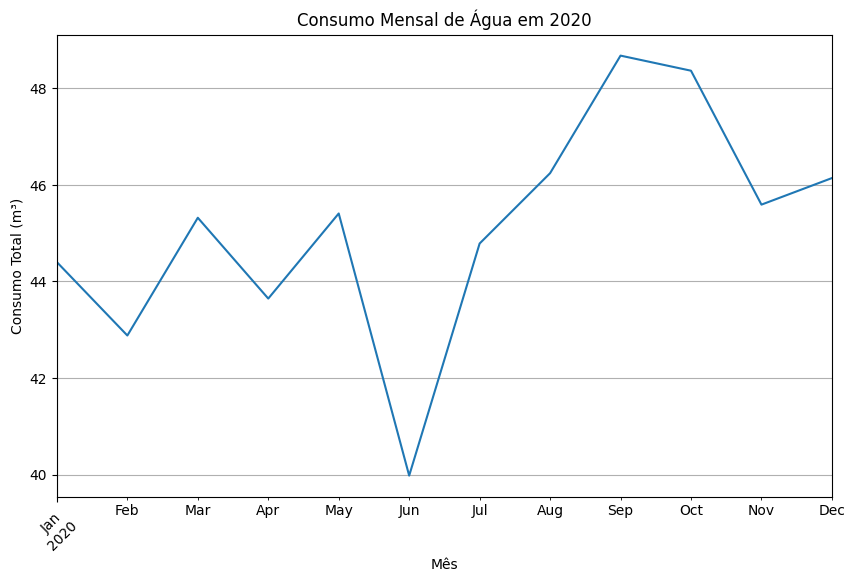

In [32]:
# Gerando o gráfico de consumo mensal de água para o ano de 2020
consumo_mensal_2020 = df_consumo.groupby(df_consumo['REFERENCIA'])['CONS_MEDIDO'].sum()

plt.figure(figsize=(10, 6))
consumo_mensal_2020.plot()
plt.title('Consumo Mensal de Água em 2020')
plt.xlabel('Mês')
plt.ylabel('Consumo Total (m³)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

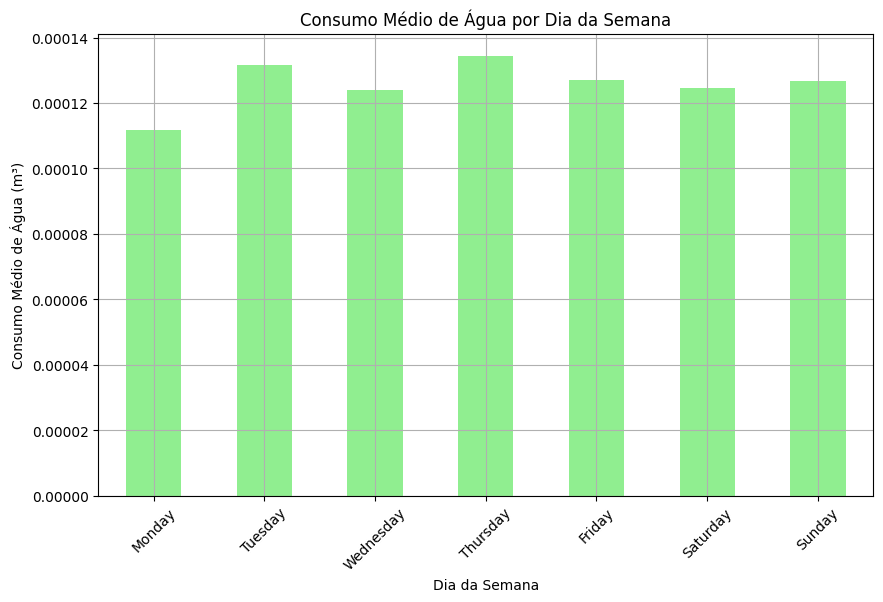

In [33]:
# Adicionando uma coluna para o dia da semana
df_consumo['DIA_DA_SEMANA'] = df_consumo['REFERENCIA'].dt.day_name()

# Calculando o consumo médio por dia da semana
consumo_medio_dia_semana = df_consumo.groupby('DIA_DA_SEMANA')['CONS_MEDIDO'].mean()

# Reordenando os dias da semana para uma visualização adequada
consumo_medio_dia_semana = consumo_medio_dia_semana.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotando o gráfico
plt.figure(figsize=(10, 6))
consumo_medio_dia_semana.plot(kind='bar', color='lightgreen')
plt.title('Consumo Médio de Água por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Consumo Médio de Água (m³)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 4.2. Dados por fraude

In [35]:
# Exibindo os "Big Numbers" para a tabela fraudes_consumo
total_registros = fraudes_consumo.shape[0]
total_fraudes = fraudes_consumo['FRAUDE'].sum()
consumo_total = fraudes_consumo['CONS_MEDIDO'].sum()
consumo_medio = fraudes_consumo['CONS_MEDIDO'].mean()
consumo_medio_fraude = fraudes_consumo[fraudes_consumo['FRAUDE'] == 1]['CONS_MEDIDO'].mean()
consumo_medio_nao_fraude = fraudes_consumo[fraudes_consumo['FRAUDE'] == 0]['CONS_MEDIDO'].mean()

print(f"Total de Registros: {total_registros}")
print(f"Total de Fraudes Identificadas: {total_fraudes}")
print(f"Consumo Total de Água: {consumo_total:.2f} m³")
print(f"Consumo Médio de Água: {consumo_medio:.2f} m³")
print(f"Consumo Médio de Água em Casos de Fraude: {consumo_medio_fraude:.2f} m³")
print(f"Consumo Médio de Água em Casos Não Fraudulentos: {consumo_medio_nao_fraude:.2f} m³")


Total de Registros: 4297810
Total de Fraudes Identificadas: 1436754
Consumo Total de Água: 541.43 m³
Consumo Médio de Água: 0.00 m³
Consumo Médio de Água em Casos de Fraude: 0.00 m³
Consumo Médio de Água em Casos Não Fraudulentos: 0.00 m³


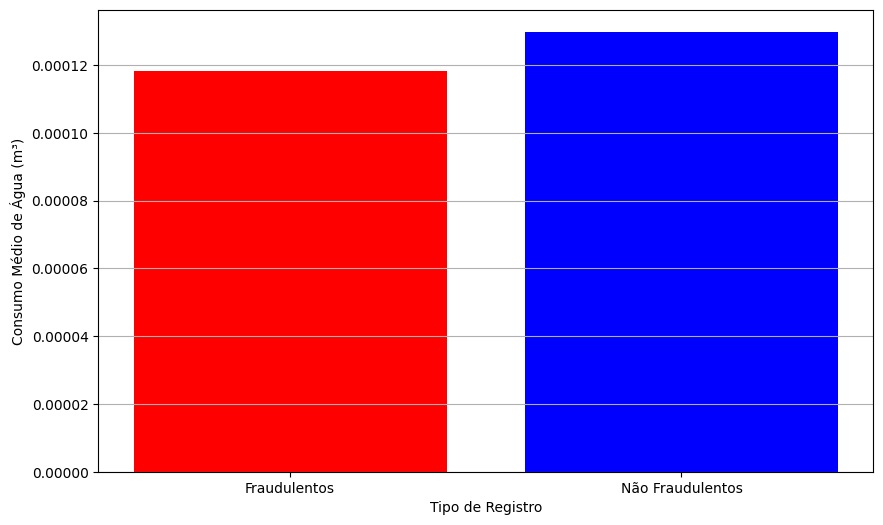

In [36]:
# 1. Calcular as médias de consumo
consumo_medio_fraude = fraudes_consumo[fraudes_consumo['FRAUDE'] == 1]['CONS_MEDIDO'].mean()
consumo_medio_nao_fraude = fraudes_consumo[fraudes_consumo['FRAUDE'] == 0]['CONS_MEDIDO'].mean()

# 2. Criar o gráfico
labels = ['Fraudulentos', 'Não Fraudulentos']
consumo_medios = [consumo_medio_fraude, consumo_medio_nao_fraude]

plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.bar(labels, consumo_medios, color=['red', 'blue'])

# Título e rótulos
plt.ylabel('Consumo Médio de Água (m³)')
plt.xlabel('Tipo de Registro')

# Exibir o gráfico
plt.grid(axis='y')
plt.show()


<ipython-input-37-e2aaa48c7021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['REFERENCIA'] = pd.to_datetime(filtered_df['REFERENCIA'])


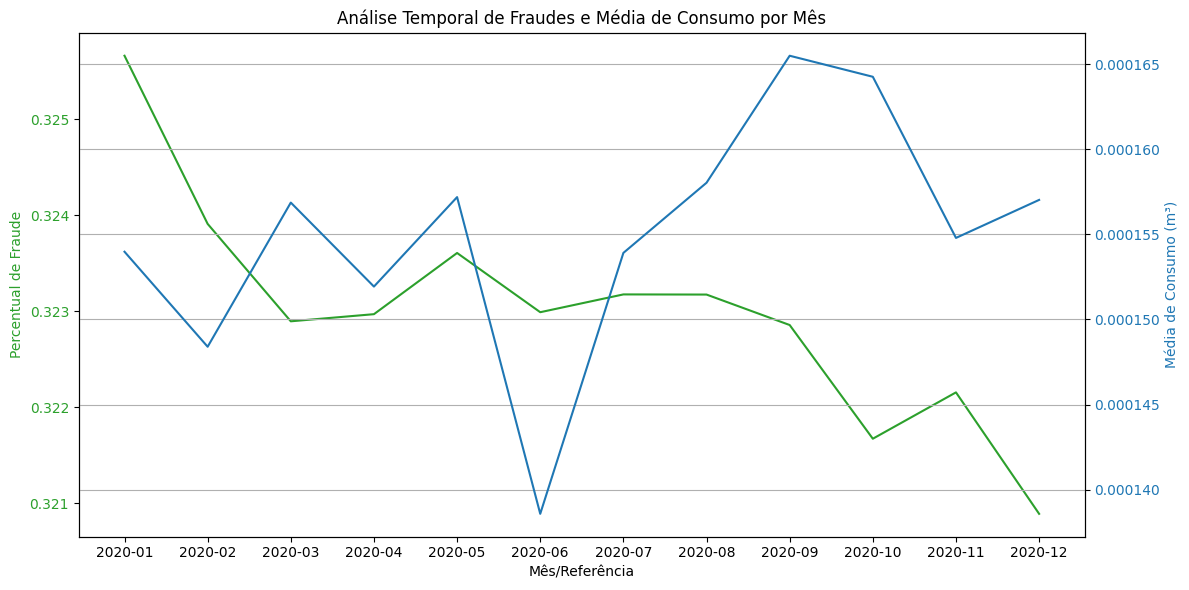

In [37]:
# Converter 'REFERENCIA' para o formato datetime
filtered_df['REFERENCIA'] = pd.to_datetime(filtered_df['REFERENCIA'])

# Calcular a porcentagem de fraude por mês
fraude_por_mes = filtered_df.groupby(filtered_df['REFERENCIA'].dt.to_period('M'))['FRAUDE'].mean()

# Calcular a média de consumo por mês
media_consumo_por_mes = filtered_df.groupby(filtered_df['REFERENCIA'].dt.to_period('M'))['CONS_MEDIDO'].mean()

# Plotar
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:green'
ax1.set_xlabel('Mês/Referência')
ax1.set_ylabel('Percentual de Fraude', color=color)
ax1.plot(fraude_por_mes.index.astype(str), fraude_por_mes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instancia um segundo eixo que compartilha o mesmo eixo x
color = 'tab:blue'
ax2.set_ylabel('Média de Consumo (m³)', color=color)
ax2.plot(media_consumo_por_mes.index.astype(str), media_consumo_por_mes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Análise Temporal de Fraudes e Média de Consumo por Mês')
fig.tight_layout()  # Ajusta layout para não sobrepor elementos
plt.grid(True)
plt.show()


<ipython-input-38-84a1679762af>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(fraude_por_ocorrencia.index, rotation=45, ha='right')


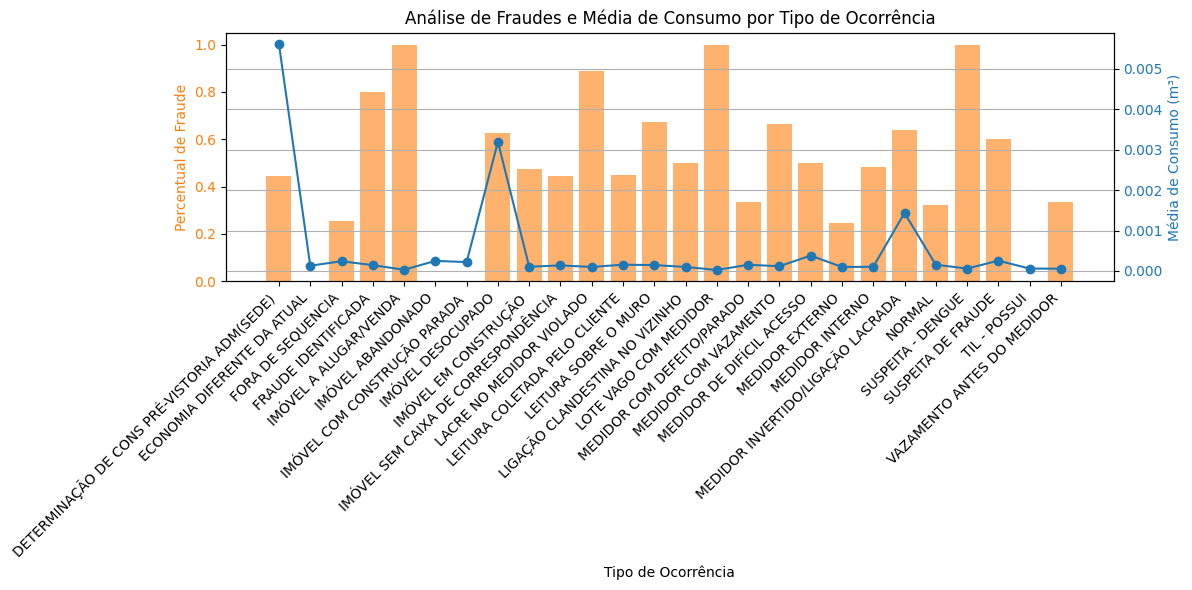

In [38]:
# Calcular a porcentagem de fraudes por tipo de ocorrência
fraude_por_ocorrencia = filtered_df.groupby('DSC_OCORRENCIA')['FRAUDE'].mean()

# Calcular a média de consumo por tipo de ocorrência
media_consumo_por_ocorrencia = filtered_df.groupby('DSC_OCORRENCIA')['CONS_MEDIDO'].mean()

# Plotar
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:orange'
ax1.set_xlabel('Tipo de Ocorrência')
ax1.set_ylabel('Percentual de Fraude', color=color)
ax1.bar(fraude_por_ocorrencia.index, fraude_por_ocorrencia, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(fraude_por_ocorrencia.index, rotation=45, ha='right')

ax2 = ax1.twinx()  # Instancia um segundo eixo que compartilha o mesmo eixo x
color = 'tab:blue'
ax2.set_ylabel('Média de Consumo (m³)', color=color)
ax2.plot(fraude_por_ocorrencia.index, media_consumo_por_ocorrencia, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Análise de Fraudes e Média de Consumo por Tipo de Ocorrência')
fig.tight_layout()  # Ajusta layout para não sobrepor elementos
plt.grid(True)
plt.show()

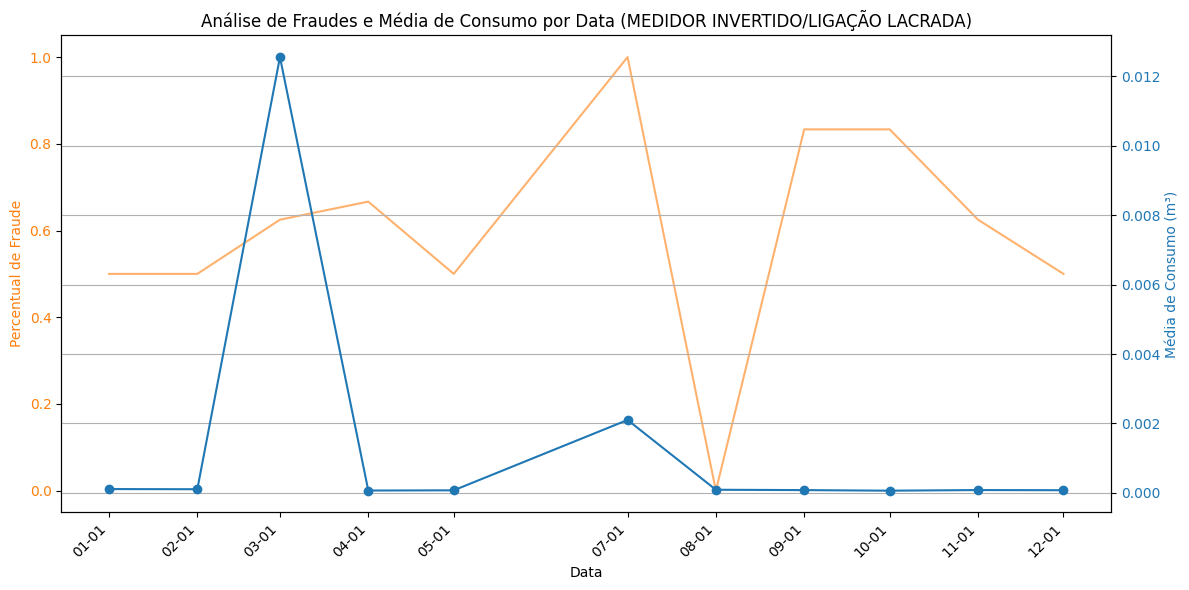

In [57]:
import matplotlib.pyplot as plt

# Filtrar o DataFrame para obter apenas as ocorrências onde DSC_OCORRENCIA é "imóvel desocupado"
filtered_dff = filtered_df[filtered_df['DSC_OCORRENCIA'] == 'MEDIDOR INVERTIDO/LIGAÇÃO LACRADA']

# Calcular a porcentagem de fraudes e média de consumo por data
fraude_por_data = filtered_dff.groupby('REFERENCIA')['FRAUDE'].mean()
media_consumo_por_data = filtered_dff.groupby('REFERENCIA')['CONS_MEDIDO'].mean()

# Plotar
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:orange'
ax1.set_xlabel('Data')
ax1.set_ylabel('Percentual de Fraude', color=color)
ax1.plot(fraude_por_data.index, fraude_por_data, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(fraude_por_data.index)  # Define os ticks do eixo x para serem as datas
ax1.set_xticklabels(fraude_por_data.index.strftime('%m-%d'), rotation=45, ha='right')  # Formata as datas

ax2 = ax1.twinx()  # Instancia um segundo eixo que compartilha o mesmo eixo x
color = 'tab:blue'
ax2.set_ylabel('Média de Consumo (m³)', color=color)
ax2.plot(media_consumo_por_data.index, media_consumo_por_data, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Análise de Fraudes e Média de Consumo por Data (MEDIDOR INVERTIDO/LIGAÇÃO LACRADA)')
fig.tight_layout()  # Ajusta layout para não sobrepor elementos
plt.grid(True)
plt.show()

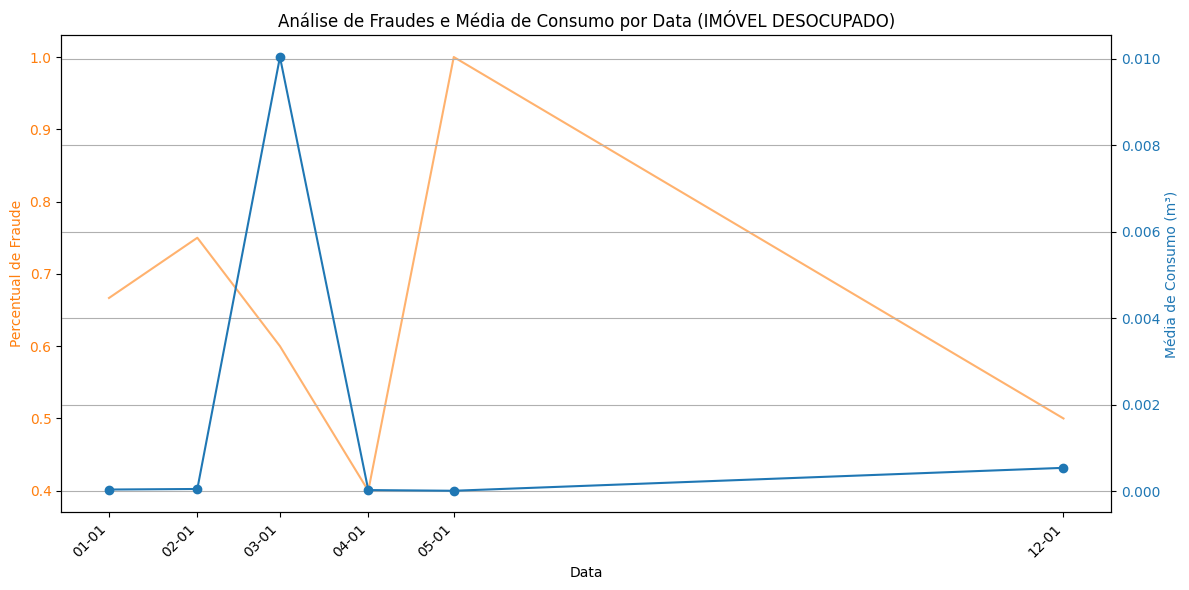

In [63]:
import matplotlib.pyplot as plt

# Filtrar o DataFrame para obter apenas as ocorrências onde DSC_OCORRENCIA é "imóvel desocupado"
filtered_dff = filtered_df[filtered_df['DSC_OCORRENCIA'] == 'IMÓVEL DESOCUPADO']

# Calcular a porcentagem de fraudes e média de consumo por data
fraude_por_data = filtered_dff.groupby('REFERENCIA')['FRAUDE'].mean()
media_consumo_por_data = filtered_dff.groupby('REFERENCIA')['CONS_MEDIDO'].mean()

# Plotar
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:orange'
ax1.set_xlabel('Data')
ax1.set_ylabel('Percentual de Fraude', color=color)
ax1.plot(fraude_por_data.index, fraude_por_data, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(fraude_por_data.index)  # Define os ticks do eixo x para serem as datas
ax1.set_xticklabels(fraude_por_data.index.strftime('%m-%d'), rotation=45, ha='right')  # Formata as datas

ax2 = ax1.twinx()  # Instancia um segundo eixo que compartilha o mesmo eixo x
color = 'tab:blue'
ax2.set_ylabel('Média de Consumo (m³)', color=color)
ax2.plot(media_consumo_por_data.index, media_consumo_por_data, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Análise de Fraudes e Média de Consumo por Data (IMÓVEL DESOCUPADO)')
fig.tight_layout()  # Ajusta layout para não sobrepor elementos
plt.grid(True)
plt.show()

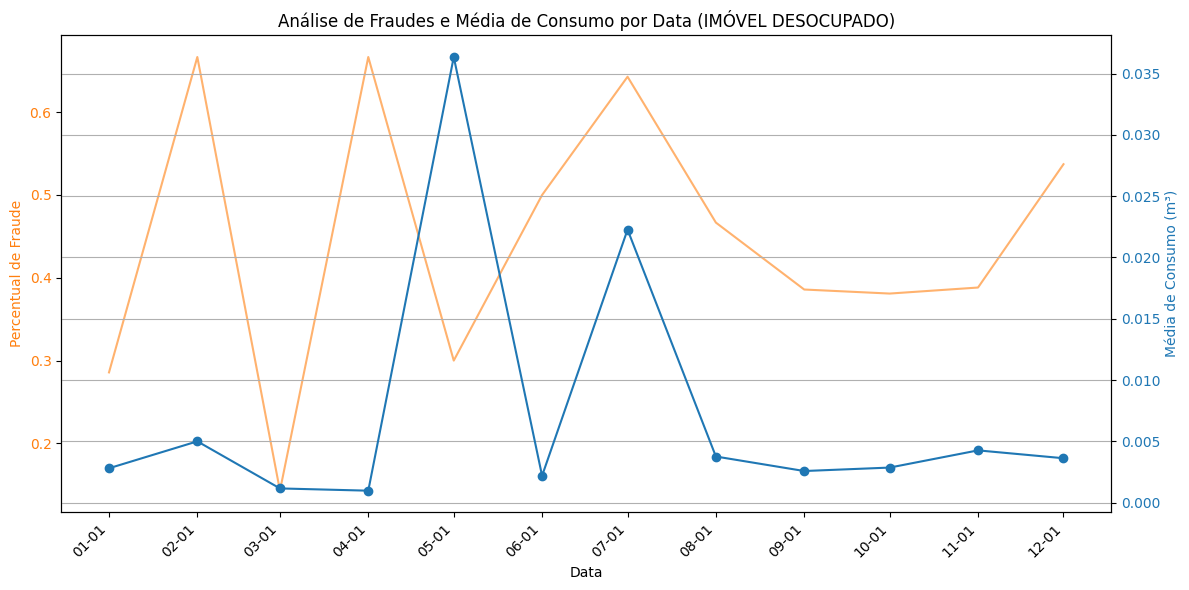

In [65]:
import matplotlib.pyplot as plt

# Filtrar o DataFrame para obter apenas as ocorrências onde DSC_OCORRENCIA é "imóvel desocupado"
filtered_dff = filtered_df[filtered_df['DSC_OCORRENCIA'] == 'DETERMINAÇÃO DE CONS PRÉ-VISTORIA ADM(SEDE)']

# Calcular a porcentagem de fraudes e média de consumo por data
fraude_por_data = filtered_dff.groupby('REFERENCIA')['FRAUDE'].mean()
media_consumo_por_data = filtered_dff.groupby('REFERENCIA')['CONS_MEDIDO'].mean()

# Plotar
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:orange'
ax1.set_xlabel('Data')
ax1.set_ylabel('Percentual de Fraude', color=color)
ax1.plot(fraude_por_data.index, fraude_por_data, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(fraude_por_data.index)  # Define os ticks do eixo x para serem as datas
ax1.set_xticklabels(fraude_por_data.index.strftime('%m-%d'), rotation=45, ha='right')  # Formata as datas

ax2 = ax1.twinx()  # Instancia um segundo eixo que compartilha o mesmo eixo x
color = 'tab:blue'
ax2.set_ylabel('Média de Consumo (m³)', color=color)
ax2.plot(media_consumo_por_data.index, media_consumo_por_data, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Análise de Fraudes e Média de Consumo por Data (DETERMINAÇÃO DE CONS PRÉ-VISTORIA ADM(SEDE))')
fig.tight_layout()  # Ajusta layout para não sobrepor elementos
plt.grid(True)
plt.show()